# Практическая работа 2

#### ЗАДАНИЕ



1. Провести статистическую обработку текста.

2. Определить энтропию, приходящуюся в среднем на одну букву, длину кода при 
равномерном кодировании и избыточность.

3. Построить схему алфавитного кодирования для однобуквенных сочетаний методом 
Шеннона-Фано. Найти среднюю длину элементарного кода, эффективность сжатия.

4. Закодировать текст. Декодировать текст.

5. Построить схему алфавитного кодирования для двухбуквенных сочетаний методом 
Шеннона-Фано.
6. Найти среднюю длину элементарного кода, эффективность сжатия, 
сравнить с результатами для однобуквенных сочетаний. 
7. Закодировать текст. Декодировать 
текст. 


#### Отладочный код для алгоритма Шеннона-Фано

In [13]:

def shannon_fano(probs):
        items = sorted(probs.items(), key=lambda item: item[1], reverse=True)  # сортировка по вероятности
        codes = {}

        def _shannon_fano_recursive(items, prefix=""):
            if len(items) <= 1:
                if items:
                    codes[items[0][0]] = prefix  # если элемент один, то присваиваем ему префикс
                    print(f"Примененый код: {codes[items[0][0]]} для : {items[0][0]}")  # отладочный вывод
                return

            totalProbs = sum(prob for _, prob in items)
            print(f"сумма тотал вероятностей :{totalProbs}")  # отладочный вывод для проверки суммы вероятностей
            leftProbs = 0
            splitIndex = 0
            minDiff = float('inf')
            for i in range(1, len(items)):
                leftProbs = sum(prob for _, prob in items[:i])
                rightProbs = totalProbs - leftProbs
                diff = abs(leftProbs - rightProbs)
                if diff < minDiff:
                    minDiff = diff
                    splitIndex = i

            print(f"Индекс : {splitIndex}, Вероятность: {leftProbs}")  # отладочный вывод для проверки индекса и вероятности

            left = items[:splitIndex]
            right = items[splitIndex:]
            print(f"лево : {left}, право : {right}")
            _shannon_fano_recursive(left, prefix + "0")  # рекурсивно вызываем функцию для левой части и добавляем префикс 0
            _shannon_fano_recursive(right, prefix + "1")  # рекурсивно вызываем функцию для правой части и добавляем префикс 1

        _shannon_fano_recursive(items)
        return codes

probs = {'a': 0.4, 'b': 0.3, 'c': 0.2, 'd': 0.1}
codes = shannon_fano(probs)
print(codes)

сумма тотал вероятностей :1.0
Индекс : 1, Вероятность: 0.9
лево : [('a', 0.4)], право : [('b', 0.3), ('c', 0.2), ('d', 0.1)]
Примененый код: 0 для : a
сумма тотал вероятностей :0.6
Индекс : 1, Вероятность: 0.5
лево : [('b', 0.3)], право : [('c', 0.2), ('d', 0.1)]
Примененый код: 10 для : b
сумма тотал вероятностей :0.30000000000000004
Индекс : 1, Вероятность: 0.2
лево : [('c', 0.2)], право : [('d', 0.1)]
Примененый код: 110 для : c
Примененый код: 111 для : d
{'a': '0', 'b': '10', 'c': '110', 'd': '111'}


#### Отладочный код для работы с текстом и статически обработанными данными

In [20]:
import string;
from collections import Counter;
import math;

######################
file_path = "text.txt"
######################

with open(file_path, 'r', encoding='UTF-8') as file:
    text = file.read()
    cleanText = text.lower().translate(str.maketrans('','', string.punctuation)).replace(' ', '')
    charCounter = Counter(cleanText)

    ########################################

    binGram_counts = {}
    for i in range(len(cleanText) -1):
        bingram = cleanText[i:i+2];
        if bingram in binGram_counts:
            binGram_counts[bingram] +=1;
        else:
            binGram_counts[bingram] = 1;
    ########################################
    totalChars = sum(charCounter.values())

    charProbs = {char : count / totalChars for char, count in charCounter.items()}

    entropy = -sum( p * math.log2(p) for p in charProbs.values())
    ########################################

    totalBinGrams = sum(binGram_counts.values())

    binGramProbs = {binGram : count / totalBinGrams for binGram, count in binGram_counts.items()}

    binGramEntropy = -sum( p * math.log2(p) for p in binGramProbs.values())
    #########################################
    # Для однобуквенных символов и бинграм при равноменном кодировании формула Длины кода : l = |log2(m).

    lengChars = math.ceil(math.log2(len(charProbs)))

    lengBin = math.ceil(math.log2(len(binGramProbs)))
    ########################################

    
    #D0 = 1 - H/l

    #Dp = 1 - H / log2(m)

    D0_chars = 1 - entropy / lengChars

    Dp_chars = 1 - entropy / math.log2(len(charProbs)) 


    D0_bingrams = 1 - binGramEntropy / lengBin

    Dp_bingrams = 1 - binGramEntropy / math.log2(len(binGramProbs))

    ########################################

    def shannon_fano(probs):
        items = sorted(probs.items(), key=lambda item : item[1], reverse=True) #сортировка по вероятности
        codes = {}
        def _shannon_fano_recursive(items, prefix = ""):
            if len(items) <= 1:
                if items :
                    codes[items[0][0]] = prefix ## если элемент один, то присваиваем ему префикс 
                    print(f"Примененый код: {codes[items[0][0]]} для : {items[0][0]}")# отладочный вывод
                return 

            totalProbs = sum(prob for _, prob in items)
            print(f"сумма тотал вероятностей :{totalProbs}") # отладочный вывод для проверки суммы вероятностей 
            leftProbs = 0
            splitIndex = 0
            minDiff = float('inf')
            for i in range(1, len(items)):
                leftProbs = sum(prob for _, prob in items[:i])
                rightProbs = totalProbs - leftProbs
                diff = abs(leftProbs - rightProbs)
                if diff < minDiff:
                    minDiff = diff
                    splitIndex = i

            print (f"Индекс : {splitIndex}, Вероятность: {leftProbs}")  # отладочный вывод для проверки индекса и вероятности

            left = items[:splitIndex]
            right = items[splitIndex:]
            print(f"лево : {left}, право : {right}")
            _shannon_fano_recursive(left, prefix + "0") ##рекурсивно вызываем функцию для левой части и добавляем префикс 0
            _shannon_fano_recursive(right, prefix + "1") ##рекурсивно вызываем функцию для правой части и добавляем префикс 1 
       
        _shannon_fano_recursive(items)
        return codes
codes = shannon_fano(charProbs)
print(codes)


сумма тотал вероятностей :1.0
Индекс : 2, Вероятность: 0.9523809523809524
лево : [('а', 0.24761904761904763), ('б', 0.24761904761904763)], право : [('в', 0.20952380952380953), ('г', 0.1523809523809524), ('д', 0.09523809523809523), ('е', 0.047619047619047616)]
сумма тотал вероятностей :0.49523809523809526
Индекс : 1, Вероятность: 0.24761904761904763
лево : [('а', 0.24761904761904763)], право : [('б', 0.24761904761904763)]
Примененый код: 00 для : а
Примененый код: 01 для : б
сумма тотал вероятностей :0.5047619047619047
Индекс : 1, Вероятность: 0.4571428571428572
лево : [('в', 0.20952380952380953)], право : [('г', 0.1523809523809524), ('д', 0.09523809523809523), ('е', 0.047619047619047616)]
Примененый код: 10 для : в
сумма тотал вероятностей :0.29523809523809524
Индекс : 1, Вероятность: 0.24761904761904763
лево : [('г', 0.1523809523809524)], право : [('д', 0.09523809523809523), ('е', 0.047619047619047616)]
Примененый код: 110 для : г
сумма тотал вероятностей :0.14285714285714285
Индекс :

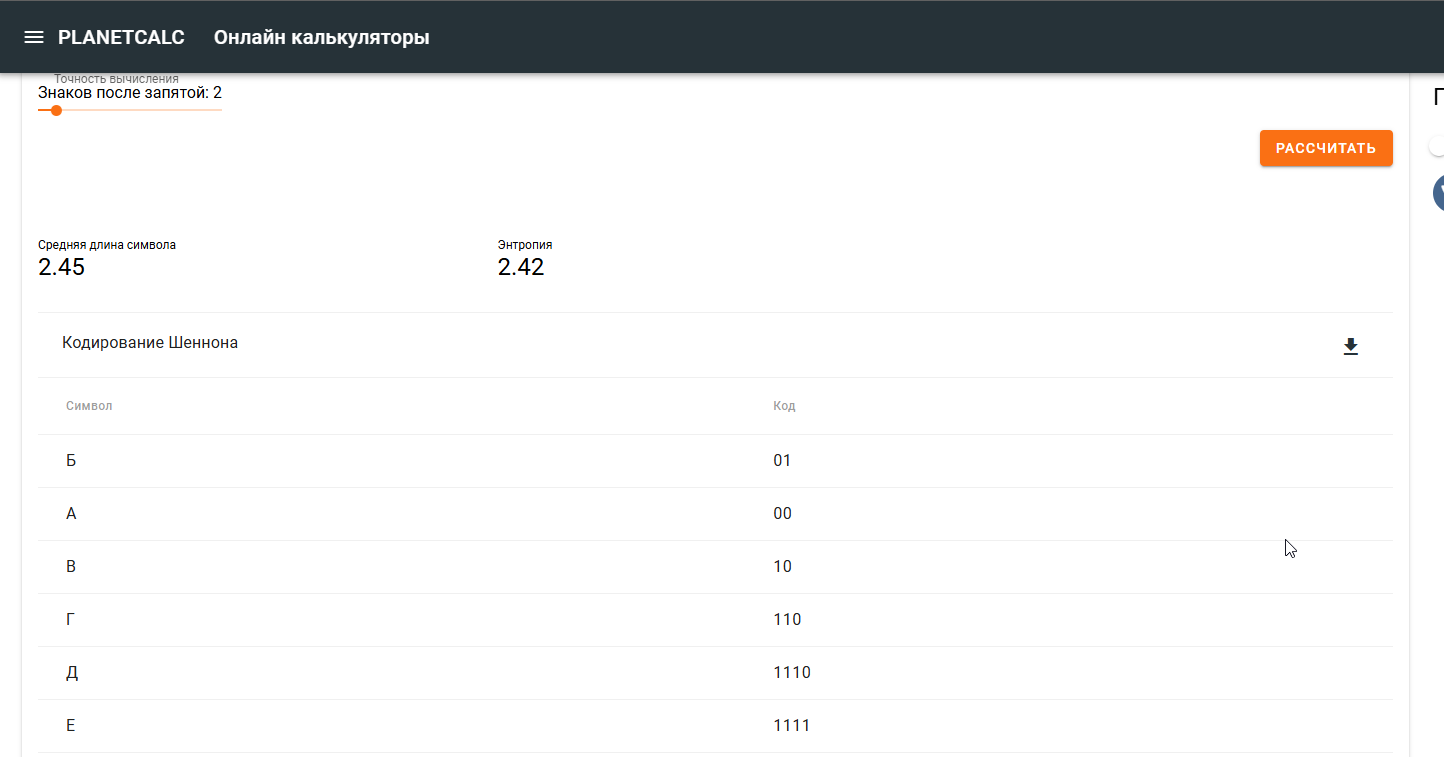

#### Собственно задание

In [1]:
import string;
from collections import Counter;
import math;

######################
file_path = "text.txt"
######################

with open(file_path, 'r', encoding='UTF-8') as file:
    text = file.read()
    cleanText = text.lower().translate(str.maketrans('','', string.punctuation)).replace(' ', '')
    charCounter = Counter(cleanText)

    ########################################

    binGram_counts = {}
    for i in range(len(cleanText) -1):
        bingram = cleanText[i:i+2];
        if bingram in binGram_counts:
            binGram_counts[bingram] +=1;
        else:
            binGram_counts[bingram] = 1;
    ########################################
    totalChars = sum(charCounter.values())

    charProbs = {char : count / totalChars for char, count in charCounter.items()}

    entropy = -sum( p * math.log2(p) for p in charProbs.values())
    ########################################

    totalBinGrams = sum(binGram_counts.values())

    binGramProbs = {binGram : count / totalBinGrams for binGram, count in binGram_counts.items()}

    binGramEntropy = -sum( p * math.log2(p) for p in binGramProbs.values())
    #########################################
    # Для однобуквенных символов и бинграм при равноменном кодировании формула Длины кода : l = |log2(m).

    lengChars = math.ceil(math.log2(len(charProbs)))

    lengBin = math.ceil(math.log2(len(binGramProbs)))
    ########################################

    
    #D0 = 1 - H/l

    #Dp = 1 - H / log2(m)

    D0_chars = 1 - entropy / lengChars

    Dp_chars = 1 - entropy / math.log2(len(charProbs)) 


    D0_bingrams = 1 - binGramEntropy / lengBin

    Dp_bingrams = 1 - binGramEntropy / math.log2(len(binGramProbs))

    ########################################

    def shannon_fano(probs):
        items = sorted(probs.items(), key=lambda item : item[1], reverse=True) #сортировка по вероятности
        codes = {}
        def _shannon_fano_recursive(items, prefix = ""):
            if len(items) <= 1:
                if items :
                    codes[items[0][0]] = prefix ## если элемент один, то присваиваем ему префикс 
             #       print(f"Примененый код: {codes[items[0][0]]} для : {items[0][0]}")# отладочный вывод
                return 

            totalProbs = sum(prob for _, prob in items)
            #print(f"сумма тотал вероятностей :{totalProbs}") # отладочный вывод для проверки суммы вероятностей 
            leftProbs = 0
            splitIndex = 0
            minDiff = float('inf')
            for i in range(1, len(items)):
                leftProbs = sum(prob for _, prob in items[:i])
                rightProbs = totalProbs - leftProbs
                diff = abs(leftProbs - rightProbs)
                if diff < minDiff:
                    minDiff = diff
                    splitIndex = i

            #print (f"Индекс : {splitIndex}, Вероятность: {leftProbs}")  # отладочный вывод для проверки индекса и вероятности

            left = items[:splitIndex]
            right = items[splitIndex:]
            #print(f"лево : {left}, право : {right}")
            _shannon_fano_recursive(left, prefix + "0") ##рекурсивно вызываем функцию для левой части и добавляем префикс 0
            _shannon_fano_recursive(right, prefix + "1") ##рекурсивно вызываем функцию для правой части и добавляем префикс 1 
       
        _shannon_fano_recursive(items)
        return codes
# Кодирование однобуквенных сочетаний
codes = shannon_fano(charProbs)
print(codes)
avg_Len = sum(len(codes[char]) * prob for char, prob in charProbs.items())
char_coding_efficiency = entropy / avg_Len

# Кодирование текста
encoded_text_chars = "".join(codes[char] for char in cleanText)
# Декодирование текста
# Создаем обратный словарь для декодирования
reverse_codes = {v: k for k, v in codes.items()} 

# Простое декодирование с использованием обратного словаря
decoded_text_chars = ""
current_code = ""
for bit in encoded_text_chars: # Проходим по всем битам закодированного текста
    current_code += bit     # Добавляем текущий бит к текущему коду
    if current_code in reverse_codes: # Если текущий код есть в обратном словаре
        decoded_text_chars += reverse_codes[current_code] # Добавляем соответствующий символ в декодированный текст
        current_code = "" # Обнуляем текущий код 

# Кодирование двухбуквенных сочетаний
codes = shannon_fano(binGramProbs)
avg_Len_bin = sum(len(codes[binGram]) * prob for binGram, prob in binGramProbs.items())
char_coding_efficiency_bin = binGramEntropy / avg_Len
# Кодирование текста двухбуквенными сочетаниями
encoded_text_chars_bingram = "".join(codes[binGram] for binGram in binGram_counts.keys())
# Декодирование текста
# Создаем обратный словарь для декодирования
reverse_codes = {v: k for k, v in codes.items()}
decoded_text_chars_bingram = ""
current_code = ""
for bit in encoded_text_chars_bingram: # Проходим по всем битам закодированного текста
    current_code += bit     # Добавляем текущий бит к текущему коду
    if current_code in reverse_codes: # Если текущий код есть в обратном словаре
        decoded_text_chars_bingram += reverse_codes[current_code] # Добавляем соответствующий символ в декодированный текст
        current_code = "" # Обнуляем текущий код


print(f"Средняя длина кода: {avg_Len}")
print(f"Эффективность кодирования: {char_coding_efficiency}")
print(f"Длина исходного текста: {len(cleanText)}")
print(f"Длина закодированного текста: {len(encoded_text_chars)}")
print(f"Исходный текст: {cleanText}")
print(f"Закодированный текст: {encoded_text_chars}")
print(f"Декодированный текст: {decoded_text_chars}\n")

print(codes)
print(f"средняя длина кода для биграмм: {avg_Len_bin}")
print(f"Эффективность кодирования для биграмм: {char_coding_efficiency_bin}")
print(f"Длина исходного текста: {len(cleanText)}")
print(f"Длина закодированного текста: {len(encoded_text_chars_bingram)}")
print(f"Закодированный текст: {encoded_text_chars_bingram}")
print(f"Декодированный текст: {decoded_text_chars_bingram}")



{'а': '00', 'б': '01', 'в': '10', 'г': '110', 'д': '1110', 'е': '1111'}
Средняя длина кода: 2.4380952380952383
Эффективность кодирования: 0.9907675663213871
Длина исходного текста: 105
Длина закодированного текста: 256
Исходный текст: ааааааааааааааааааааааааааббббббббббббббббббббббббббввввввввввввввввввввввггггггггггггггггддддддддддеееее
Закодированный текст: 0000000000000000000000000000000000000000000000000000010101010101010101010101010101010101010101010101010110101010101010101010101010101010101010101010110110110110110110110110110110110110110110110110111011101110111011101110111011101110111011111111111111111111
Декодированный текст: ааааааааааааааааааааааааааббббббббббббббббббббббббббввввввввввввввввввввввггггггггггггггггддддддддддеееее

{'аа': '00', 'бб': '01', 'вв': '10', 'гг': '110', 'дд': '1110', 'ее': '11110', 'аб': '1111100', 'бв': '1111101', 'вг': '1111110', 'гд': '11111110', 'де': '11111111'}
средняя длина кода для биграмм: 2.6923076923076925
Эффективность кодирования для бигр